In [13]:
%reset -f

In [14]:
%connect_info

{
  "shell_port": 35845,
  "iopub_port": 43771,
  "stdin_port": 37075,
  "control_port": 56371,
  "hb_port": 43113,
  "ip": "127.0.0.1",
  "key": "8ced130a-4c97bcc9163217a9fe64eecf",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-62da778d-c220-4643-8667-41c65399f54f.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import itertools

In [16]:
dir_data = "run5_fordemo/"
path_base = "/home/trix_arch/IIVspace/DataSc/"+\
            "DataCamp2021/DSR_B28_work/DSR28_portfolio_project/"+\
            "Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/"
pathW = path_base + dir_data
os.chdir(pathW)
os.getcwd()

files_list = os.listdir(pathW)
files_list.sort()

In [17]:
files_list

['beer_1_roomoffice_20211221_103219.csv',
 'beer_2_roomoffice_20211221_110730.csv',
 'beer_3_roomlecture_20211221_115234.csv',
 'coffee_1_roomoffice_20211221_100825.csv',
 'coffee_2_roomoffice_20211221_104426.csv',
 'coffee_3_roomlecture_20211221_112519.csv',
 'orange_1_roomoffice_20211221_101954.csv',
 'orange_2_roomoffice_20211221_105552.csv',
 'orange_3_roomlecture_20211221_113846.csv']

In [18]:
Xdf = pd.DataFrame([], columns=["time_ms", 
                                "B102NO2", "B302C2H5OH", "B502VOC", "B702CO", 
                                "TdegC", "RH", 
                                "label", "add_label", "condition"])

for fileN in files_list:
    file_info = fileN.split("_")
    label_c = file_info[0]
    add_label_c = file_info[1]
    condition_c = file_info[2]
    
    df_c = pd.read_csv(fileN)
    
    feature_add_dict = {
        "label": label_c,
        "add_label": add_label_c,
        "condition": condition_c,
    } 
    df_c_upd = pd.concat([df_c, pd.DataFrame(feature_add_dict, index=df_c.index)], axis=1)
    Xdf = pd.concat([Xdf, df_c_upd], axis=0)


In [19]:
Xdf

,time_ms,B102NO2,B302C2H5OH,B502VOC,B702CO,TdegC,RH,label,add_label,condition
0,15,549,153,514,318,25,34,beer,1,roomoffice
1,16,548,154,515,318,25,34,beer,1,roomoffice
2,16,549,153,515,319,25,34,beer,1,roomoffice
3,16,549,154,515,318,25,34,beer,1,roomoffice
4,17,549,154,515,319,25,34,beer,1,roomoffice
...,...,...,...,...,...,...,...,...,...,...
2395,315040,900,360,800,345,27,32,orange,3,roomlecture
2396,315171,900,360,801,345,27,32,orange,3,roomlecture
2397,315302,899,361,802,346,27,32,orange,3,roomlecture
2398,315433,900,360,801,345,27,32,orange,3,roomlecture


In [20]:
Xdf.label.unique().tolist()

['beer', 'coffee', 'orange']

In [21]:
Xdf["label_label"] = Xdf[["label","add_label"]]\
                        .agg("_".join, axis=1)\
                        .replace("[0-9]", "", regex=True)

In [22]:
Xdf.sample()

,time_ms,B102NO2,B302C2H5OH,B502VOC,B702CO,TdegC,RH,label,add_label,condition,label_label
284,39472,944,537,886,586,24,34,orange,1,roomoffice,orange_


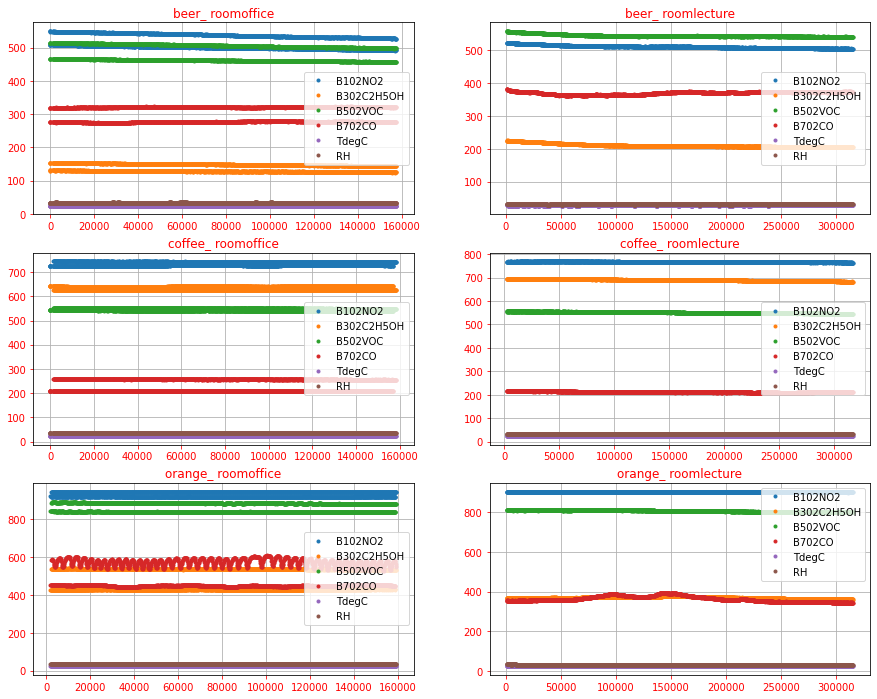

In [23]:


labels = Xdf.label_label.unique().tolist()
conditions = Xdf.condition.unique().tolist()
figure_scale = 1
plt.figure(figsize=(figure_scale*15, figure_scale*len(labels)*4))
plot_c = 0

for label_c in labels:
    for condition_c in conditions:
        Xplot = Xdf.loc[
            (Xdf.label_label==label_c) & (Xdf.condition==condition_c),
            :]
        plot_c += 1
        plt.subplot(len(labels), len(conditions), plot_c)
        plt.plot(Xplot.time_ms, Xplot.iloc[:,1:7], '.')
        plt.legend(Xplot.iloc[:,1:7].columns.to_list())
        plt.title(" ".join([label_c, condition_c]), color="red")
        plt.tick_params(axis='x', colors='red')
        plt.tick_params(axis='y', colors='red')
        plt.grid()